In [ ]:
# Import necessary libraries
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

In [ ]:
# Choose whether to use only CPU or GPU
usar_somente_CPU = True #Deixar True ou False

if usar_somente_CPU:
    tf.config.set_visible_devices([], 'GPU')
    print("Dispositivos visíveis:", tf.config.get_visible_devices())

Dispositivos visíveis: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [ ]:
# SEED for reproducibility
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
#Read the dataset
df = pd.read_csv('../data_per_month.csv')
df = df['Total Renewable Energy']

In [ ]:
# Function to create windowed sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [ ]:
# Normalization of the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df.values.reshape(-1, 1))

# Define the sequence length
time_steps = 12
X, y = create_sequences(data_scaled, time_steps)

# Divide the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Construction of the LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Training the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plotting the training history
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}')

# Make predictions
y_pred = model.predict(X_test)

# Revert the scaling of the predictions and actual values
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

Epoch 1/150


/home/heitor/Área de Trabalho/Github/neuroevolution/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0753 - mae: 0.2454 - val_loss: 0.0076 - val_mae: 0.0702
Epoch 2/150
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0082 - mae: 0.0777

2025-06-04 11:04:29.016303: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mae: 0.0958 - val_loss: 0.0731 - val_mae: 0.2614
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - mae: 0.0594 - val_loss: 0.0163 - val_mae: 0.1111
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mae: 0.0445 - val_loss: 0.0045 - val_mae: 0.0544
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mae: 0.0419 - val_loss: 0.0045 - val_mae: 0.0549
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mae: 0.0400 - val_loss: 0.0045 - val_mae: 0.0541
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mae: 0.0399 - val_loss: 0.0044 - val_mae: 0.0541
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mae: 0.0398 - val_loss: 0.0044 - val_mae: 0.0539
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mae: 0.0397 - val_loss: 0.0044 - val_mae: 0.0538
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mae: 0.

2025-06-04 11:04:40.461518: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


MAE: 17.6075
MSE: 600.4960
RMSE: 24.5050
R² Score: 0.5477


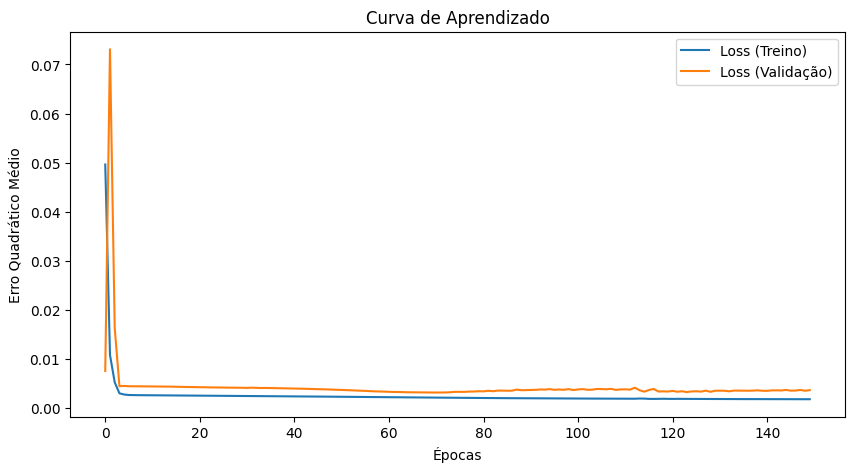

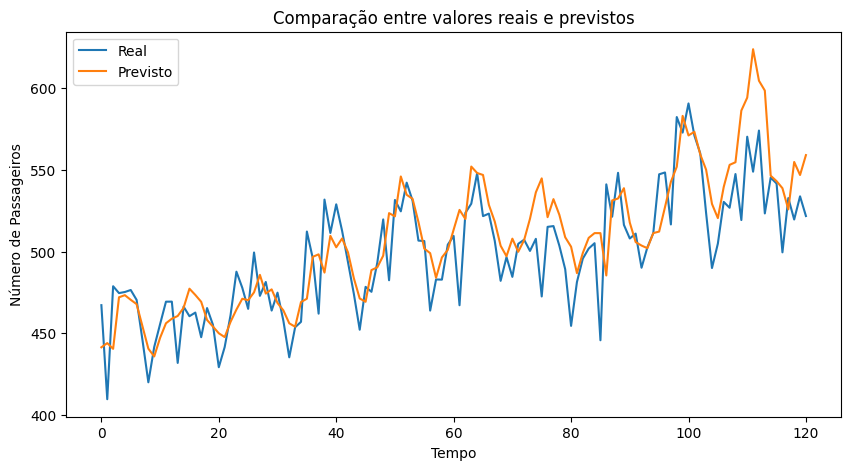

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot of the training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss (Treino)')
plt.plot(history.history['val_loss'], label='Loss (Validação)')
plt.xlabel('Épocas')
plt.ylabel('Erro Quadrático Médio')
plt.legend()
plt.title('Curva de Aprendizado')
plt.show()

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Real')
plt.plot(y_pred_inv, label='Previsto')
plt.xlabel('Tempo')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.title('Comparação entre valores reais e previstos')
plt.show()